# Image Segmentation using K-means Algo

In [1]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

In [2]:
img = cv2.imread("./image1.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

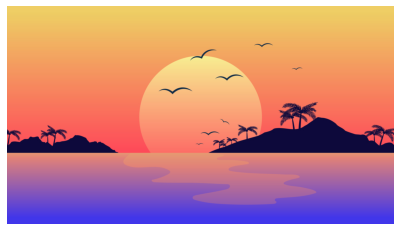

In [3]:
plt.figure(0,figsize=(8,4))
plt.axis('off')
plt.imshow(img)
plt.show()

In [4]:
img = np.array(img)
original_img_shape = img.shape

In [5]:
img = img.reshape((-1,3))

In [6]:
print(img.shape)

(1440000, 3)


In [7]:
dominant_colors = 4
kmeans = KMeans(n_clusters=dominant_colors)

In [8]:
kmeans.fit(img)

KMeans(n_clusters=4)

In [9]:
all_colors = np.array(kmeans.cluster_centers_,dtype='uint8')

In [10]:
all_colors

array([[111,  76, 200],
       [234, 122, 107],
       [ 17,  11,  59],
       [242, 183, 104]], dtype=uint8)

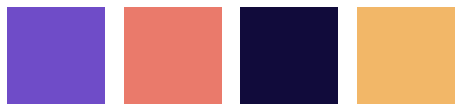

In [11]:
plt.figure(0,figsize=(8,4))
i = 1
colors = []
for col in all_colors:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    graph = np.zeros((100,100,3),dtype='uint8')
    graph[:,:,:] = col
    colors.append(col)
    plt.imshow(graph)

plt.show()

In [12]:
ids = kmeans.labels_
print(ids)

[3 3 3 ... 0 0 0]


In [13]:
new_img = np.zeros(img.shape,dtype='uint8')
for i in range(new_img.shape[0]):
    new_img[i] = colors[ids[i]]

new_img = new_img.reshape(original_img_shape)

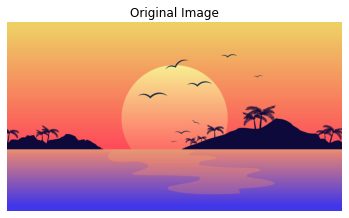

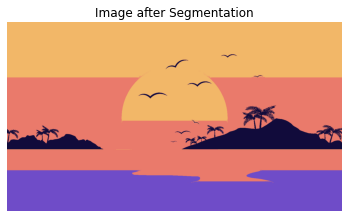

In [14]:
plt.title("Original Image")
plt.axis('off')
plt.imshow(img.reshape(original_img_shape))
plt.show()
plt.title("Image after Segmentation")
plt.axis('off')
plt.imshow(new_img)
plt.show()